In [ ]:
#!pip install --upgrade tensorflow==1.15

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
layer = {
    'input': 1,
    'output': 1
}

batch_size = 4
time_step = 2
epoch = 1000

In [ ]:
def load_dataset():
    dataset = pd.read_csv("dataset.csv")
    dataset.insert(0, "Date", "0") #Membuat kolom baru yaitu Date
    #P
    for i, Quarter in enumerate(dataset["Quarter"]):
        if(Quarter == 1):
            dataset["Date"][i] = dt.datetime(dataset["Year"][i],3,31)
        elif(Quarter == 2):
            dataset["Date"][i] = dt.datetime(dataset["Year"][i],6,30)
        elif(Quarter == 3):
            dataset["Date"][i] = dt.datetime(dataset["Year"][i],9,30)
        elif(Quarter == 4):
            dataset["Date"][i] = dt.datetime(dataset["Year"][i],12,31)
    
    dataset = dataset.set_index("Date")
    dataset = dataset.drop(columns=["Quarter","Year"])
    return dataset

In [ ]:
def get_batch(dataset, time_step, batch_size):
  input_batch = np.zeros(shape = (batch_size, time_step, layer['input']))
  output_batch = np.zeros(shape = (batch_size, time_step, layer['output']))

  for i in range(batch_size):
    point = np.random.randint(0, len(dataset) - time_step)
    input_batch += dataset[point : point+time_step]
    output_batch += dataset[point+1 : point+time_step+1]
  
  return input_batch, output_batch

In [ ]:
dataset = load_dataset()
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

,Births
Date,
2000-03-31,14778
2000-06-30,14231
2000-09-30,14017
2000-12-31,13579
2001-03-31,14728
2001-06-30,13897
2001-09-30,13656
2001-12-31,13518
2002-03-31,13648


In [ ]:
split = int(len(dataset) * 0.75)
train_dataset = dataset[:split]
test_dataset = dataset[split:]

In [ ]:
scaler = MinMaxScaler().fit(train_dataset)
normalize_train_dataset = scaler.transform(train_dataset)

In [ ]:
cell = tf.nn.rnn_cell.BasicRNNCell(4, activation = tf.nn.sigmoid)
cell = tf.contrib.rnn.OutputProjectionWrapper(cell, layer['output'], activation = tf.nn.sigmoid)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
input_feature = tf.placeholder(tf.float32, [None, time_step, layer['input']])
input_target = tf.placeholder(tf.float32, [None, time_step, layer['output']])

In [ ]:
output, _ = tf.nn.dynamic_rnn(cell, input_feature, dtype = tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
loss = tf.reduce_mean(0.5 * (input_target - output) ** 2) #MSE
train = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1, epoch+1):
        input_batch, output_batch = get_batch(normalize_train_dataset, time_step, batch_size)
        feed = {
            input_feature: input_batch,
            input_target: output_batch
        }

        sess.run(train, feed_dict = feed)

        if(i % 200 == 0):
            print("Iteration {} = Loss: {}".format(i, sess.run(loss, feed_dict = feed)))

        if(i % 100 == 0):
            saver.save(sess, './rnn-model.ckpt')

Iteration 200 = Loss: 0.30187541246414185
Iteration 400 = Loss: 0.14771243929862976
Iteration 600 = Loss: 2.228837013244629
Iteration 800 = Loss: 0.06075957790017128
Iteration 1000 = Loss: 0.024062378332018852


INFO:tensorflow:Restoring parameters from ./rnn-model.ckpt
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


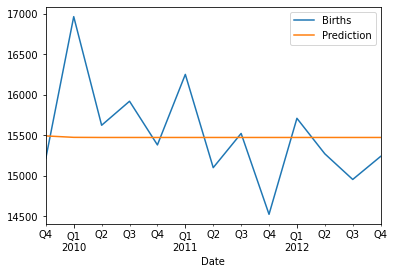

In [ ]:
with tf.Session() as sess:
    seed_data = list(normalize_train_dataset)
    saver.restore(sess, './rnn-model.ckpt')
    
    for i in range(len(test_dataset)):
        input_batch = np.array(seed_data[-time_step:]).reshape(1, time_step, layer['input'])
        print(input_batch.shape)
        feed = {
            input_feature: input_batch
        }
        predict = sess.run(output, feed_dict = feed)
        seed_data.append(predict[0, -1, 0])

    predict_result = scaler.inverse_transform(np.array(seed_data[-len(test_dataset):]).reshape([len(test_dataset), 1]))
    test_dataset["Prediction"] = predict_result
    test_dataset.plot()
    plt.show()